# Automatic Analysis of Benchmark Experiments

## Summary

This notebook presents a simple automatic analysis of experiments using CC18 benchmark suite.
Here, we provide functions to get experiments results from [OpenML](http://www.openml.org/) website, handle them, and output some basic performance charts.


## 1. Setup

First, we need to install all the required packages. We will need a function called *checkPackages* located into the R sub directory. This can be done with the following commands:

In [107]:
required.packages = c("ggplot2","reshape2","mlr","plyr","dplyr","farff","OpenML","scmamp")
source("R/checkPackages.R")
checkPackages(pkgs = required.packages)

 @ All required packages installed.


The code presented above is simple: it just checks if R packages required for the analyses are installed. If not, they will be installed.

Then, we need to load two packages for plots: 'reshape2' and 'ggplto2'. They are loaded via the *'library'* command.

In [108]:
library("ggplot2")
library("reshape2")

Then, we need to setup the OpenML API to get the data and *farff* to read the data from the server :

In [109]:
# apikey = Sys.getenv('OPENMLKEY')
# OpenML::setOMLConfig(arff.reader = "farff", apikey = apikey)

# Please, replace the OpenML API key with yours and uncomment the line below
#setOMLConfig(apikey = <your key>)

Finally, we need to load required R scripts, with the plot functions. All of them are in the R sub directory, located in the same folder as this file. This can be done running the following commands:

In [110]:
# load all files from R subdir
files    = list.files(path = "R", pattern = ".R$", full.names = TRUE)
files    = files[which(files != "R/minibench.R")]
null.obj = sapply(files, source, .GlobalEnv)

## 2. Loading experiment results from OpenML

So, once everything was set up, let's load our data. We would need to load:
* *datasets* - the OpenML-CC18 benchmark suite datasets;
* *tasks* - the tasks instantiated with OpenML-CC18 datasets;
* *runs* -  experimental results obtained by different machine learning algorithms using the OpenML-CC18 tasks.

Loading them would require the use of a specific tag to return results from the OpenML server. 
In this case, our tag is '*OpenML-CC18*', ensuring we will have experimental results using these benchmarking suite datasets.

The first two lines of the code below are functions provided by the OpenML R package; they will list our datasets and tasks. The following function, **getExperimentsResults(  )**, will return the first 5000 run results with the specified *tag* for each OpenML-CC18 task. 

In [111]:
datasets = OpenML::listOMLDataSets(tag = "OpenML-CC18")
head(datasets)

data.id,name,version,status,format,tags,majority.class.size,max.nominal.att.distinct.values,minority.class.size,number.of.classes,number.of.features,number.of.instances,number.of.instances.with.missing.values,number.of.missing.values,number.of.numeric.features,number.of.symbolic.features
3,kr-vs-kp,1,active,ARFF,,1669,3,1527,2,37,3196,0,0,0,37
6,letter,1,active,ARFF,,813,26,734,26,17,20000,0,0,16,1
11,balance-scale,1,active,ARFF,,288,3,49,3,5,625,0,0,4,1
12,mfeat-factors,1,active,ARFF,,200,10,200,10,217,2000,0,0,216,1
14,mfeat-fourier,1,active,ARFF,,200,10,200,10,77,2000,0,0,76,1
15,breast-w,1,active,ARFF,,458,2,241,2,10,699,16,16,9,1


In [112]:
tasks = OpenML::listOMLTasks(tag = "OpenML-CC18")
head(tasks)

task.id,task.type,data.id,name,status,format,estimation.procedure,target.feature,evaluation.measures,majority.class.size,max.nominal.att.distinct.values,minority.class.size,number.of.classes,number.of.features,number.of.instances,number.of.instances.with.missing.values,number.of.missing.values,number.of.numeric.features,number.of.symbolic.features
3,Supervised Classification,3,kr-vs-kp,active,ARFF,10-fold Crossvalidation,class,NA,1669,3,1527,2,37,3196,0,0,0,37
6,Supervised Classification,6,letter,active,ARFF,10-fold Crossvalidation,class,NA,813,26,734,26,17,20000,0,0,16,1
11,Supervised Classification,11,balance-scale,active,ARFF,10-fold Crossvalidation,class,NA,288,3,49,3,5,625,0,0,4,1
12,Supervised Classification,12,mfeat-factors,active,ARFF,10-fold Crossvalidation,class,NA,200,10,200,10,217,2000,0,0,216,1
14,Supervised Classification,14,mfeat-fourier,active,ARFF,10-fold Crossvalidation,class,NA,200,10,200,10,77,2000,0,0,76,1
15,Supervised Classification,15,breast-w,active,ARFF,10-fold Crossvalidation,Class,NA,458,2,241,2,10,699,16,16,9,1


In [113]:
df = getExperimentsResults(tasks = tasks)

 @ Getting experiment results


The last command will return an R data frame object with the main characteristics of your runs. 
It should look like something like this:

In [114]:
head(df)

run.id,task.id,setup.id,flow.id,flow.name,flow.version,flow.source,learner.name,data.name,upload.time,⋯,root.mean.prior.squared.error,root.mean.squared.error,root.relative.squared.error,scimark.benchmark,total.cost,usercpu.time.millis,usercpu.time.millis.testing,usercpu.time.millis.training,build.cpu.time,build.memory
28,3,18,77,weka.LogitBoost_DecisionStump(1),1,weka,LogitBoost_DecisionStump,kr-vs-kp,2014-04-06 23:47:04,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
78,3,3,58,weka.NaiveBayes(1),1,weka,NaiveBayes,kr-vs-kp,2014-04-07 00:03:46,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
139,3,2,57,weka.OneR(1),1,weka,OneR,kr-vs-kp,2014-04-07 00:46:29,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
217,3,7,62,weka.DecisionStump(1),1,weka,DecisionStump,kr-vs-kp,2014-04-07 01:25:07,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
221,3,6,61,weka.REPTree(1),1,weka,REPTree,kr-vs-kp,2014-04-07 01:27:12,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
246,3,12,67,weka.BayesNet_K2(1),1,weka,BayesNet_K2,kr-vs-kp,2014-04-07 01:39:06,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## 4. Merging data frames
The following step is to merge our data frames (datasets, tasks and runs) into a single data structure (this will help us generating plots and analyzes).
We can merge them executing the following set of commands:

In [115]:
info = merge(datasets, tasks, by = intersect(colnames(datasets), colnames(tasks)))
tmp  = dplyr::select(.data = info, data.id, task.id, name, number.of.instances, 
                    number.of.features, number.of.classes, majority.class.size)
colnames(tmp)[3] = "data.name"

new.data = merge(df, tmp, by = intersect(colnames(df), colnames(tmp)))
new.data$perc.maj.class = new.data$majority.class.size / new.data$number.of.instances


We can check the resultant data frame through the command:

In [116]:
# resultant data frame
head(new.data)

task.id,data.name,number.of.instances,run.id,setup.id,flow.id,flow.name,flow.version,flow.source,learner.name,⋯,usercpu.time.millis,usercpu.time.millis.testing,usercpu.time.millis.training,build.cpu.time,build.memory,data.id,number.of.features,number.of.classes,majority.class.size,perc.maj.class
11,balance-scale,625,581901,2869,2228,weka.SMO_PolyKernel(11),11,weka,SMO_PolyKernel,,20,0,20,NA,NA,11,5,3,288,0.4608
11,balance-scale,625,581859,2869,2228,weka.SMO_PolyKernel(11),11,weka,SMO_PolyKernel,,20,10,10,NA,NA,11,5,3,288,0.4608
11,balance-scale,625,581818,2869,2228,weka.SMO_PolyKernel(11),11,weka,SMO_PolyKernel,,20,10,10,NA,NA,11,5,3,288,0.4608
11,balance-scale,625,575575,6248,3899,weka.AttributeSelectedClassifier_AdaBoostM1_DecisionStump(1),1,weka,AttributeSelectedClassifier_AdaBoostM1_DecisionStump,,20,0,20,NA,NA,11,5,3,288,0.4608
11,balance-scale,625,581775,2869,2228,weka.SMO_PolyKernel(11),11,weka,SMO_PolyKernel,,20,0,20,NA,NA,11,5,3,288,0.4608
11,balance-scale,625,575729,6251,3904,weka.AttributeSelectedClassifier_BayesNet(1),1,weka,AttributeSelectedClassifier_BayesNet,,20,10,10,NA,NA,11,5,3,288,0.4608


## 5. Getting tasks overview

The first analysis overviews the OpenML-CC18 tasks used in experiments. 
The following function (**tasksInfoPlot**) will receive our complete data frame (new.data) and shows general aspects of these tasks.

In the chart below, the x-axis represents all the tasks with runs in the experiment. 
The y-axis represents the performance values. We have three different points here:
* **green dots** that indicate the maximum accuracy (*max_acc*) value reached in each task;
* **orange triangles** that indicate the maximum AUC (*max_auc*) value reached in each task; and
* **dark squares** that indicate the percentage of examples belonging to the majority class (*perc_maj*) in each task.

The plot is generated below. Passing your data as an argument will generate a similar plot for your tasks.

Warning message:
"Removed 9 rows containing missing values (geom_point)."

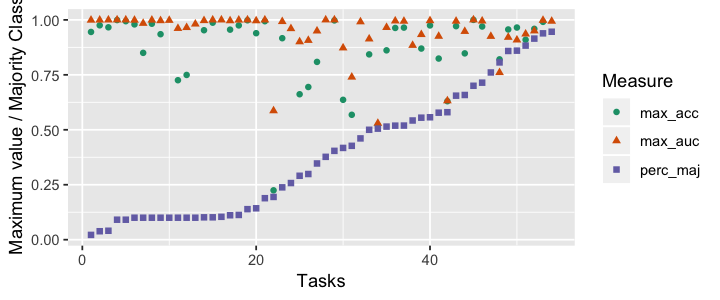

In [121]:
# Arguments:
#  * data: metled data frame return by getExperimentsData() function
# Output:
#  ggplot chart

# Calling the function and showing the chart
options(repr.plot.width=6, repr.plot.height=2.5)
tasksInfoPlot(data = new.data)

## 5. Subseting experimental results obtained with WEKA classifiers

We can focus our analyzes in some specific algorithms. 
For example, we can filter results obtained with some of the WEKA classifiers:
* decision tree (*J48*);
* Random Forest (*RandomForest*);
* k-Nearest Neighbors (*IBk*); 
* Support Vector Machines (*SVMs*);
* Multilayer Perceptron (*MLP*); 
* Naive Bayes (*NaiveBayes*), and 
* a linear classifier (*Logistic*).

Subsetting them can be done with the following commands:

In [122]:
weka.algos = c("J48","RandomForest","IBk","LibSVM","MultilayerPerceptron","Logistic", "NaiveBayes")
weka.data  = dplyr::filter(new.data, flow.source == 'weka', learner.name %in% weka.algos)
sel.data   = weka.data
print(unique(sel.data$learner.name))

[1] "J48"                  "RandomForest"         "IBk"                 
[4] "MultilayerPerceptron" "Logistic"             "NaiveBayes"          
[7] "LibSVM"              


## 6. Simple performance plots

With the previously defined we can now do some basic performance comparisons and plots, such as line plots, box plots, heat maps, and so on.

But first, we need to generate a performance matrix according to a specific evaluation measure. 
Here, we are generating the plots based on `measure = 'predictive.accuracy'`.

In [123]:
# Getting the performance matrix
mat.acc = performanceMatrix(data = sel.data, measure = "predictive.accuracy")
head(mat.acc)

# Some other examples:
# mat.auc  = getPerfMatrix(data = data, measure = "area.under.roc.curve")
# mat.f1   = getPerfMatrix(data = data, measure = "f.measure")
# mat.kap  = getPerfMatrix(data = data, measure = "kappa")
# mat.time = getPerfMatrix(data = data, measure = "usercpu.time.millis") 


 - Getting performance matrix for: predictive.accuracy


,J48,RandomForest,IBk,MultilayerPerceptron,Logistic,NaiveBayes,LibSVM
11,0.777600,0.814400,0.884800,0.868800,0.896000,NA,NA
12,0.890500,0.969500,0.956500,0.363500,0.979500,0.924000,NA
14,0.762500,0.840000,0.810000,0.373500,0.742000,0.759500,0.764500
14965,0.905974,0.903497,0.888191,0.896574,0.901418,0.880007,0.883037
14969,0.485972,0.688139,0.598400,0.500253,0.475843,0.417401,0.298795
14970,0.872026,0.982037,0.956209,0.974658,0.970094,0.749005,0.955141


The cells that present 'NA' values indicate cases with missing results or the algorithm failed to fit a model in that task. With the performance matrix, we can generate rankings using the **getRanking** function. 
It will return an object with two slots:
* *rk* : is a matrix where each cell contains the algorithms ranking for a specific task; and 
* *rk.avg*: is the average ranking for all the algorithms evaluated over all the tasks.

Examples are shown in the commands below.

In [124]:
# Getting the accuracy rankings
rk.acc  = generateRanking(mat = mat.acc,  descending = TRUE)
head(rk.acc$rk)
head(rk.acc$rk.avg)

# Some other examples
# rk.auc  = getRanking(mat = mat.auc, descending = TRUE)   # higher - better
# rk.f1   = getRanking(mat = mat.f1,  descending = TRUE)   # higher - better
# rk.time = getRanking(mat = mat.time, descending = FALSE) # lower  - better

,J48,RandomForest,IBk,MultilayerPerceptron,Logistic,NaiveBayes,LibSVM
11,5,4,2,3,1,NA,NA
12,5,2,3,6,1,4,NA
14,4,1,2,7,6,5,3
14965,1,2,5,4,3,7,6
14969,4,1,2,3,5,6,7
14970,6,1,4,2,3,7,5


alg,rk.avg
J48,3.515152
RandomForest,2.031250
IBk,3.096774
MultilayerPerceptron,4.533333
Logistic,2.952381
NaiveBayes,4.551724


### a) Box plot
First, we can check some box plot and have an overview of how algorithms perform in our OpenML-CC18 datasets. 
It can be done using the **simplePlot** specifying the performance measure that we want to analyze and the plot style as *boxplot*. 
The parameters needed as arguments are: 
* *data* - the data frame we created with the experimental results;
* *style* - the plot style (boxplot, violin or heatmap);
* *measure* - the performance measure analyzed.


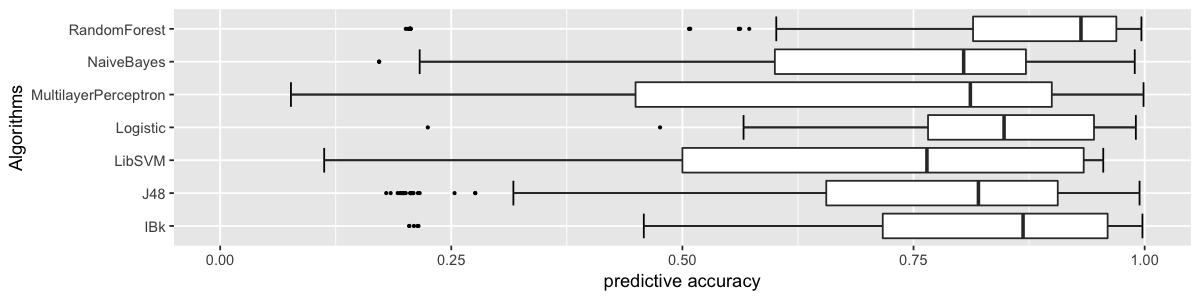

In [125]:
options(repr.plot.width=10, repr.plot.height=2.5)
simplePlot(data = sel.data, style = "boxplot", measure = "predictive.accuracy")

# Some other examples:
# simplePlot(data = data, measure = "usercpu.time.millis")
# simplePlot(data = data, measure = "usercpu.time.millis.training")
# simplePlot(data = data, measure = "usercpu.time.millis.testing")
# simplePlot(data = data, measure = "f.measure")
# simplePlot(data = data, measure = "kappa")

### B) Violin plot

The violin plot is a similar analysis to box plots, except that they also show the probability density of the values. We can generate them with the same previous function (**simplePlot**) specifying the plot style as *violin*.

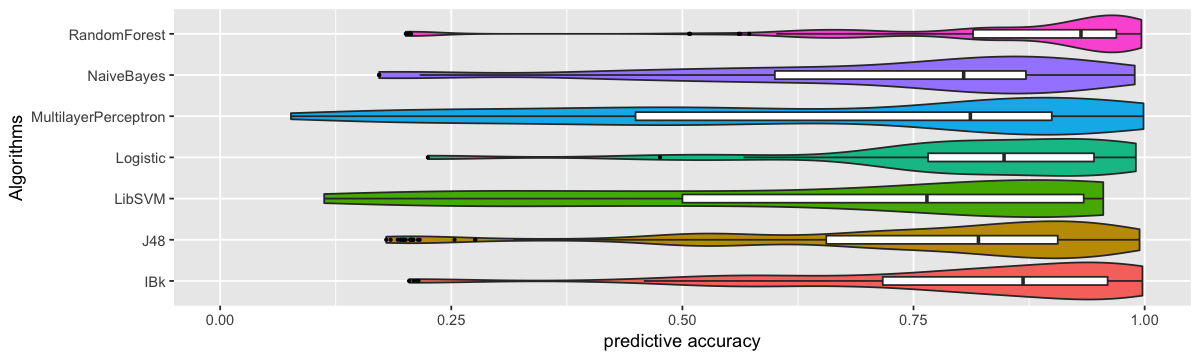

In [126]:
options(repr.plot.width=10, repr.plot.height=3)
simplePlot(data = sel.data, style = "violin",  measure = "predictive.accuracy")

# Some other examples:
# simplePlot(data, measure = "area.under.roc.curve")
# simplePlot(data, measure = "f.measure")
# simplePlot(data, measure = "usercpu.time.millis")


### c) Ranking heat map

The function **rankingHeatMap** gives a global vision of the ranks obtained in each task. 
It receives a matrix, returned by the **generateRanking** function, and plot a gray-scale heat-map. 
The lighter the values, the better the learners.
The *salmon* cells show runs that crashed or did not finished for a combination of ```{algorithm, task}```.

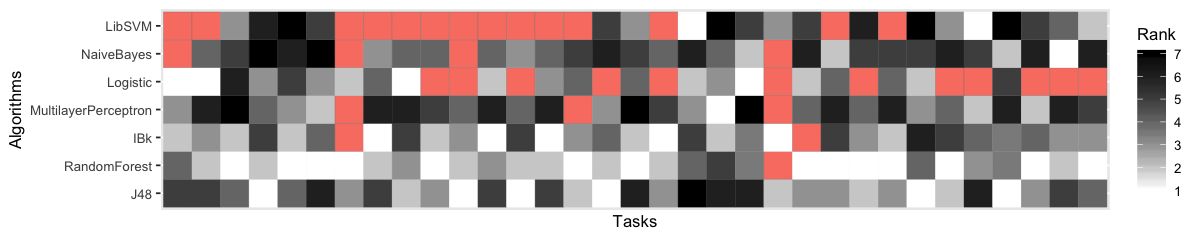

In [127]:
# ranking frequency
rk.acc     = generateRanking(mat.acc, descending = TRUE)


# Some other examples: 
# rk.auc   = generateRanking(mat.auc, descending = TRUE) 
# rk.f1    = generateRanking(mat.f1, descending = TRUE)
# rk.acc.w = generateRanking(mat.acc.w, descending = TRUE) 
# rk.time  = generateRanking(mat.runtime, descending = FALSE)

# Calling the function and showing the chart
options(repr.plot.width=10, repr.plot.height=2)
rankingHeatMap(data = rk.acc$rk)

### d) Ranking frequency

The "*ranking frequency*" plot shows how many times (or the percentage of occurrences) each algorithm appears in the **k** first rank positions. Is also uses the runtime to "*penalize*" them, i.e., the redder the bar, the more time consuming is the algorithm. On the other hand, the greyer, the faster it is.

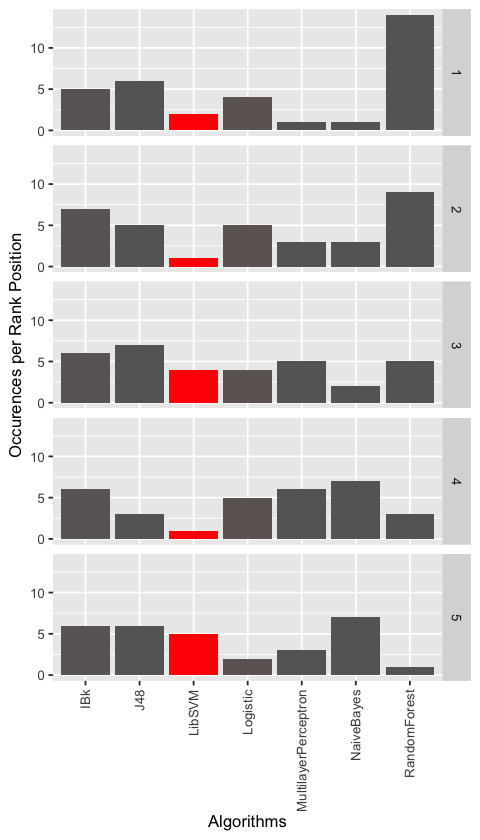

In [128]:
# Arguments:
#  * rk: the ranking generated by getRanking() function
#  * data: metled data frame return by getExperimentsData() function
#  * k: number of positions to be considered in the plot (k-rank)
#  * version: using absolute of percentage values

# Calling the function and showing the chart
options(repr.plot.width=4, repr.plot.height=7)
rankFrequencyPlot(rk = rk.acc, data = sel.data, k = 5, version = "counter")  

## 7. Runtime Analysis

Evaluating the runtime information use the same R basic functions. 
It also involves the same basic steps generating the runtime matrix and the average rankings.

In [129]:
runtime.data = getRuntimeData(data = sel.data)
head(runtime.data)

usercpu.time.millis.training,usercpu.time.millis.testing,usercpu.time.millis,alg
3.971447e+03,20.39474,3991.842,J48
3.171029e+03,901.91176,4072.941,RandomForest
7.090909e+00,219775.36364,219782.455,IBk
3.501967e+04,812.33333,35832.000,MultilayerPerceptron
4.262676e+05,172.35294,426440.000,Logistic
1.510000e+02,2698.33333,2849.333,NaiveBayes


### a) Box Plot

Like with any other performance measure, we can generate boxplots showing the time required by the algorithm to run in OpenML-CC18 tasks. 

Warning message:
"Removed 598 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 598 rows containing non-finite values (stat_boxplot)."

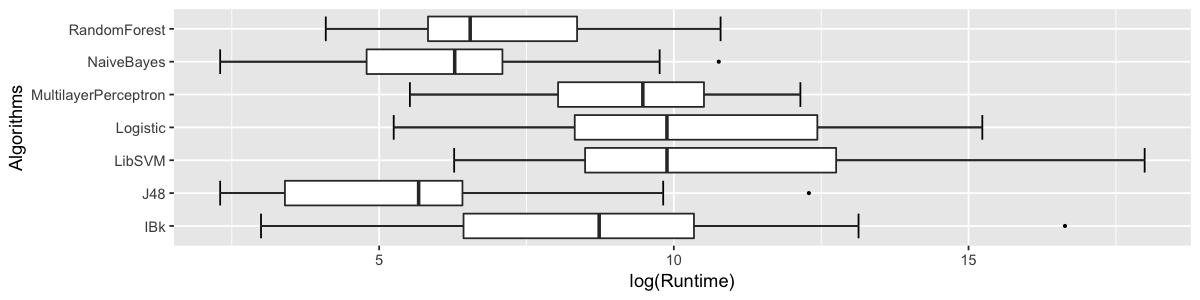

In [130]:
# Arguments:
#  * data: metled data frame return by getExperimentsData() function
#  * landscape: flip the coordinates of the chart and print it in a ladscape design (default is FALSE)
# Output:
#  * ggplot chart

options(repr.plot.width=10, repr.plot.height=2.5)
simplePlot(data = sel.data, style = "boxplot", measure = "usercpu.time.millis")

You can also call plot runtime data to show {training, testing, total} runtimes together:

Warning message:
"Removed 1893 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 1893 rows containing non-finite values (stat_boxplot)."

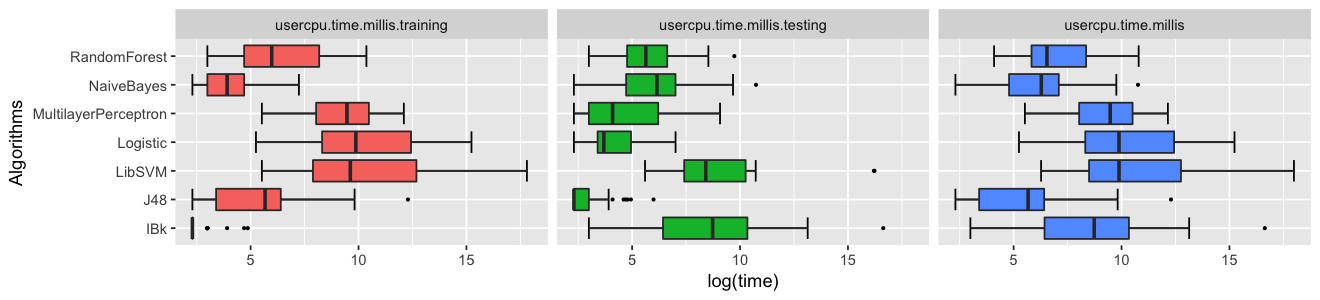

In [131]:
options(repr.plot.width=11, repr.plot.height=2.5)
runtimePlot(data = sel.data, style = "boxplot")

### c) Violin Plot

As shown before, we also have the option to use violin plots:

Warning message:
"Removed 598 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 598 rows containing non-finite values (stat_boxplot)."

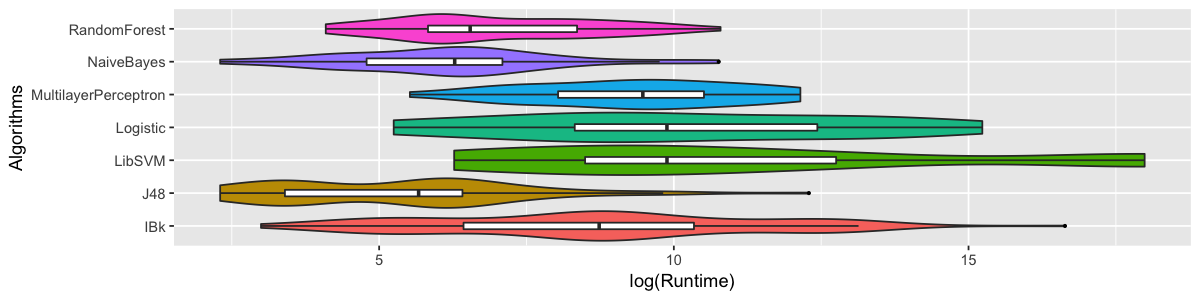

In [132]:
options(repr.plot.width=10, repr.plot.height=2.5)
simplePlot(data = sel.data, style = "violin", measure = "usercpu.time.millis")

You can also call the violin function to handle runtime data and show {training, testing, total} runtimes together:

Warning message:
"Removed 1893 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 1893 rows containing non-finite values (stat_boxplot)."

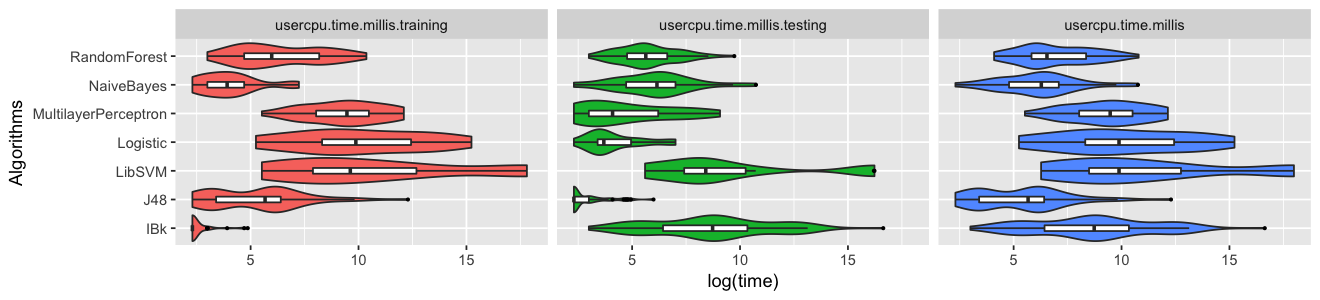

In [133]:
options(repr.plot.width=11, repr.plot.height=2.5)
runtimePlot(data = sel.data, style = "violin")

### d) Ranking heatmap plot

The ranking heatmap plot also shows a global overview of the runtime rankings. 
The lighter the cell, the faster the learner in that task.

In [134]:
mat.time = performanceMatrix(data = sel.data, measure = "usercpu.time.millis")
rk.time  = generateRanking(mat.time, descending = FALSE)
head(rk.time$rk)

 - Getting performance matrix for: usercpu.time.millis


,J48,RandomForest,IBk,MultilayerPerceptron,Logistic,NaiveBayes,LibSVM
11,1,3,2,4,NA,NA,NA
12,2,1,4,5,NA,3,NA
14,2,1,4,5,7,3,6
14965,NA,NA,2,NA,1,NA,NA
14969,NA,NA,2,NA,1,NA,NA
14970,NA,NA,1,NA,2,NA,NA


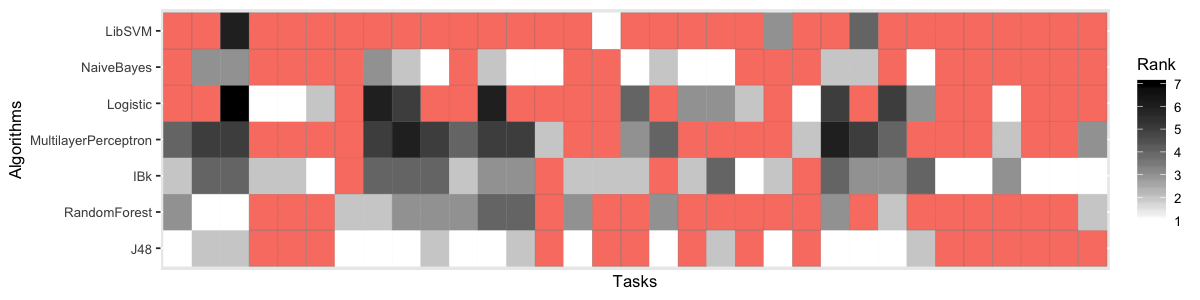

In [135]:
# Calling the function and showing the chart
options(repr.plot.width=10, repr.plot.height=2.5)
rankingHeatMap(data = rk.time$rk)   

## 8. Maximum Performance Analysis

All the previous analyzes can be generated for *scaled matrices*, i.e., performance matrices scaled according to the best performance on each task. 
They can be computed using the **scaleMatrix** function, and passed as an argument to the plotting functions. 
Scaled matrices are handled by the **scaledMatrixPlot** function as shown below by the correspondent examples.


In [136]:
scaled.mat.acc = scaleMatrix(mat = mat.acc)
head(scaled.mat.acc)

# Some other examples with different performance measures
# scaled.mat.auc = scaleMatrix(mat = mat.auc)
# scaled.mat.auc = scaleMatrix(mat = performanceMatrix(data = sel.data, measure = "area.under.roc.curve"))
# scaled.mat.runtime = scaleMatrix(mat = mat.runtime)
# scaled.mat.runtime = scaleMatrix(mat = performanceMatrix(data = sel.data, measure = "usercpu.time.millis"))

,J48,RandomForest,IBk,MultilayerPerceptron,Logistic,NaiveBayes,LibSVM
11,0.8678571,0.9089286,0.9875000,0.9696429,1.0000000,NA,NA
12,0.9091373,0.9897907,0.9765186,0.3711077,1.0000000,0.9433384,NA
14,0.9077381,1.0000000,0.9642857,0.4446429,0.8833333,0.9041667,0.9101190
14965,1.0000000,0.9972659,0.9803714,0.9896244,0.9949712,0.9713380,0.9746825
14969,0.7062120,1.0000000,0.8695918,0.7269650,0.6914926,0.6065650,0.4342073
14970,0.8879767,1.0000000,0.9736996,0.9924860,0.9878385,0.7627055,0.9726120


### a) Box plot

No id variables; using all as measure variables


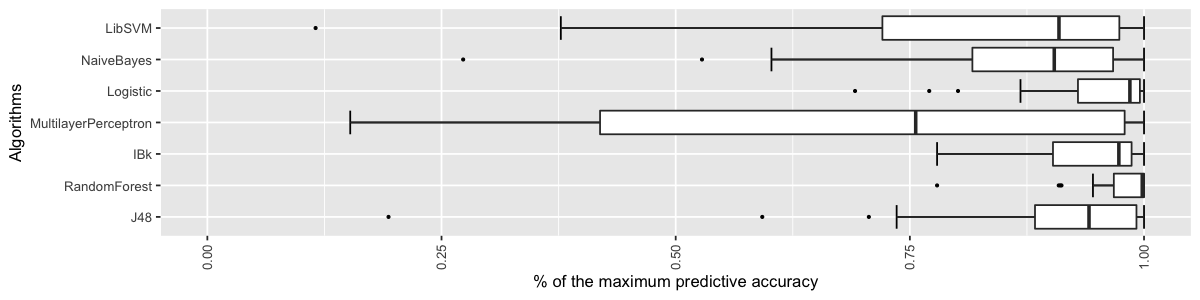

In [137]:
options(repr.plot.width=10, repr.plot.height=2.5)
scaledMatrixPlot(mat = scaled.mat.acc, prefix = "predictive accuracy", style = "boxplot")

### b) Violin Plot

No id variables; using all as measure variables


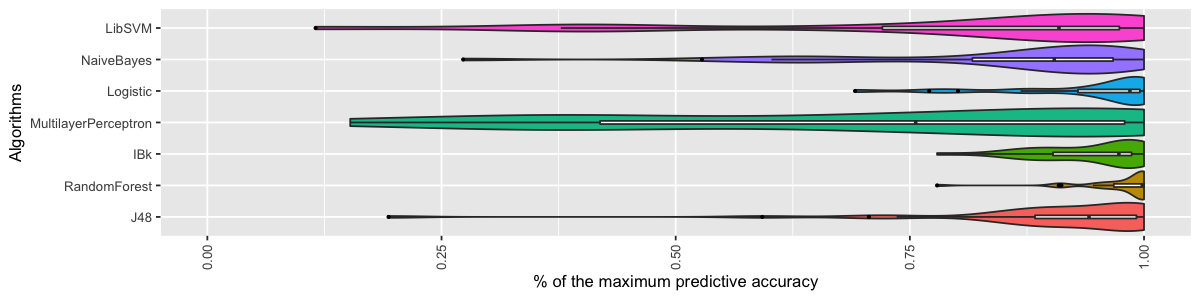

In [138]:
options(repr.plot.width=10, repr.plot.height=2.5)
scaledMatrixPlot(mat = scaled.mat.acc, prefix = "predictive accuracy", style = "violin")

### c) Ranking Heat Map Plot

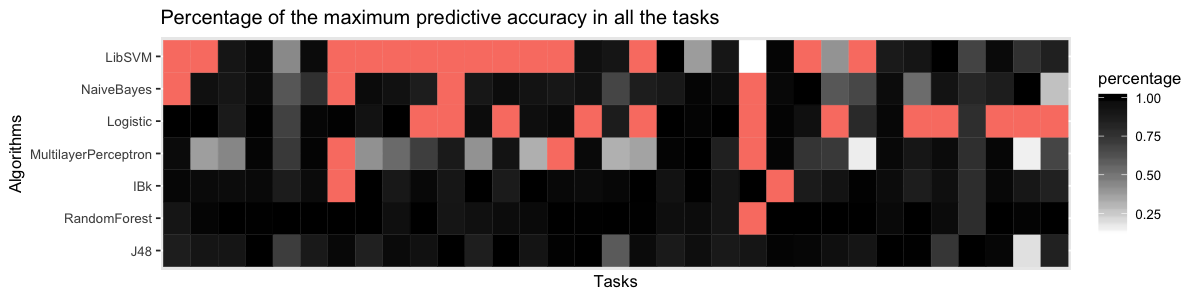

In [139]:
options(repr.plot.width=10, repr.plot.height=2.5)
scaledMatrixHeatMap(mat = scaled.mat.acc, prefix = "predictive accuracy")

## 9. Multiple analysis

We can also explore some multiple analysis, such as the radar chart.
In this plot, each vertex represents a performance measure, and the algorithms will generate a surface linking them.
The bigger the area, the better the algorithm. 
It is important to mention that all the measures must be scaled in the same interval.

**Obs:** in our chart, runtime values were converted into [0,1] interval. After that, we also subtracted 1 of the scaled values:

runtime = 1 - scaled(runtime)

so that the resulting values also maximize the use of the measure. 
The higher the value, the faster the algorithm, and the bigger is the area covered in the chart.

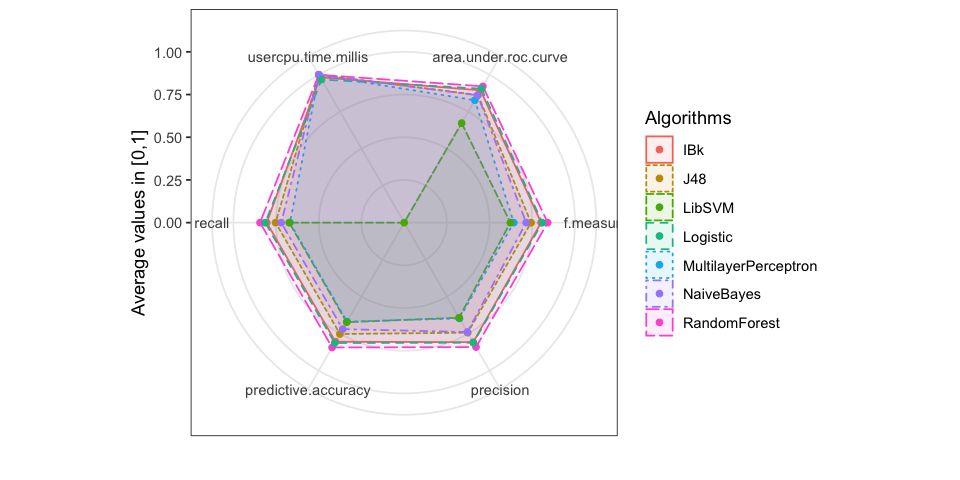

In [140]:
# By default, the following measures are considered:
# sel.measures = c("area.under.roc.curve", "predictive.accuracy", 
# "  usercpu.time.millis", "recall", "f.measure", "precision")

options(repr.plot.width=8, repr.plot.height=4)
radarChart(data = sel.data)

## 10. Statistical evaluation

The Friedman test, with a significance level of **alpha** ($\alpha$) can also be used to assess the statistical significance of the benchmark results. 
The null hypothesis is that all the algorithms are equivalent regarding the selected evaluation measure (predictive accuracy in our example).
When the null hypothesis is rejected, the Nemenyi post-hoc test is applied to indicate when two different techniques are significantly different. 
The **criticalDifferencePlot** function presents the results Critical Difference diagram. 
Techniques are connected when there are *no* significant differences between them. 

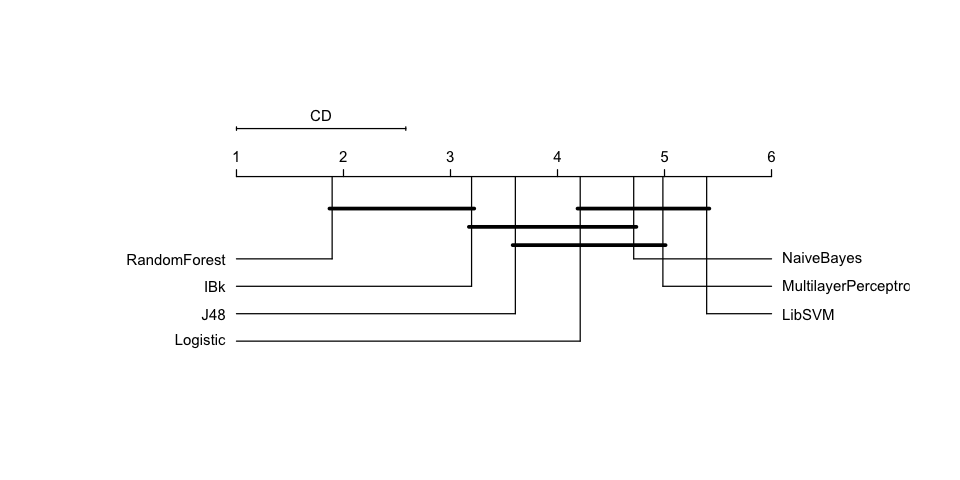

In [141]:
obj = criticalDifferencePlot(data = sel.data, measure = "predictive.accuracy", alpha = 0.05)